In [1]:
import pandas as pd

In [2]:

df = pd.read_csv('our-bma.csv')


In [3]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,AACAAAAGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGTT...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAGG...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGCCGCTGAGCGCCATTTTGT...
...,...,...
9995,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...
9996,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTTGGAACCGGGTTCGTCCGCCAATTAAGGTTGGCTTCTAGT...
9997,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...
9998,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...


In [4]:
from tqdm import tqdm


In [5]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [6]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [7]:
import difflib


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2021basic/bin/universal-darwin'

In [9]:
def print_diff(ref_strand, noisy_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, noisy_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = noisy_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]



100%|██████████| 10000/10000 [00:00<00:00, 57245.59it/s]


[24, 147, 258, 271, 251, 289, 271, 302, 327, 309, 316, 379, 362, 381, 386, 406, 415, 445, 461, 484, 487, 509, 530, 527, 561, 573, 582, 576, 601, 640, 647, 670, 663, 692, 707, 702, 752, 757, 781, 785, 810, 808, 846, 817, 839, 863, 871, 882, 891, 876, 947, 930, 965, 949, 1606, 1556, 1576, 1561, 1536, 1520, 1534, 1514, 1481, 1465, 1484, 1475, 1420, 1399, 1435, 1412, 1404, 1372, 1402, 1349, 1373, 1347, 1288, 1288, 1308, 1282, 1257, 1276, 1254, 1243, 1241, 1185, 1183, 1193, 1184, 1166, 1171, 1119, 1112, 1128, 1108, 1075, 1067, 1049, 1064, 1059, 1022, 999, 1001, 988, 942, 969, 918, 988, 644, 1347]


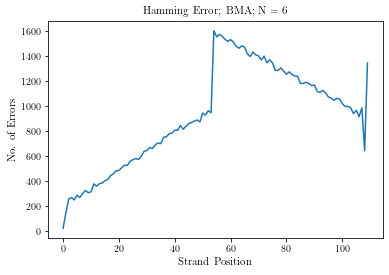

In [10]:
# Hamming Distance Graph
strand_len = 110
count_pos = [0] * (strand_len + 1)

def hamming(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1

for i in tqdm(range(len(ref_strands))):
    hamming(ref_strands[i], noisy_strands[i])

print(count_pos[:-1])
f = plt.figure()
plt.plot(range(strand_len), count_pos[:-1])
plt.title(r'Hamming Error; BMA; N = 6', fontsize=11)
plt.xlabel(r'Strand Position', fontsize=11)
plt.ylabel(r'No. of Errors', fontsize=11)
plt.show()
f.savefig('cov6-our-bma-hamming.pdf', bbox_inches='tight')

In [11]:
pairs = []
pairs_no_pos = []

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        print_diff(ref_strands[i], noisy_strands[i])


100%|██████████| 10000/10000 [00:06<00:00, 1619.56it/s]


In [12]:

subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)


 -> AAAA 6
G -> AAA 7
C -> AAA 7
TG -> A 7
 -> AAA 8
 -> CAA 8
T -> CG 9
T -> AG 9
GG ->  9
T -> AAA 9
CA ->  10
AG ->  10
AC ->  11
TC ->  11
T -> GA 11
T -> AC 12
CG ->  12
CC ->  12
TA ->  12
G -> AC 13
T -> GG 14
GA ->  14
T -> CA 15
 -> TG 17
CT ->  17
GC ->  17
TT ->  17
 -> GC 18
G -> CA 18
 -> TC 20
 -> GG 21
 -> GA 22
AT ->  24
 -> AT 24
GT ->  24
 -> GT 25
 -> AG 27
 -> TT 28
 -> CC 29
 -> CG 29
TG ->  30
 -> CA 31
 -> CT 31
 -> TA 32
T -> CC 33
 -> AC 33
G -> T 36
A -> T 39
G -> CC 42
C -> AA 45
G -> AA 50
C -> T 55
T -> AA 60
A -> G 64
 -> AA 68
C -> G 91
A -> C 96
T -> G 424
G -> A 429
G -> C 449
C -> A 459
A ->  510
 -> T 515
T -> C 553
T -> A 567
C ->  597
 -> G 626
 -> C 700
 -> A 820
G ->  1196
T ->  1375


T -> G @ 107 6
C -> A @ 71 6
T -> G @ 106 6
G ->  @ 14 6
T -> G @ 33 6
G ->  @ 15 6
G ->  @ 36 6
C ->  @ 59 6
 -> C @ 57 6
C ->  @ 57 6
T ->  @ 65 6
G ->  @ 18 6
G ->  @ 34 6
G -> A @ 78 6
G ->  @ 13 6
T -> G @ 26 6
G ->  @ 76 6
G ->  @ 26 6
G ->  @ 28 6
T ->  @ 99 6
 -> C @ 58 6
G ->  @ 86 6
C ->  @ 40 6
G -> A @ 25 6
G ->  @ 23 6
T -> A @ 6 6
 -> CA @ 53 6
T -> A @ 104 6
G ->  @ 90 6
G -> A @ 51 6
T -> A @ 87 6
T -> G @ 109 6
G -> C @ 27 6
T -> A @ 55 6
T -> A @ 102 6
G ->  @ 40 6
T ->  @ 73 6
G -> C @ 35 6
G -> C @ 62 6
T -> C @ 61 6
T ->  @ 4 6
T ->  @ 40 6
T ->  @ 52 6
G ->  @ 62 6
T -> C @ 54 6
T -> A @ 66 6
 -> G @ 2 6
C -> A @ 92 6
C ->  @ 4 6
 -> C @ 107 6
G ->  @ 68 6
T -> C @ 41 6
G ->  @ 70 6
 -> C @ 108 6
T -> C @ 68 6
T -> C @ 27 6
T -> A @ 99 6
T -> A @ 2 6
G ->  @ 43 6
G ->  @ 44 6
T -> C @ 87 6
G -> C @ 71 6
T ->  @ 82 6
G -> A @ 4 6
T -> C @ 78 6
T -> A @ 22 6
G ->  @ 2 6
G ->  @ 52 6
T -> G @ 2 7
T ->  @ 69 7
T -> G @ 22 7
G ->  @ 4 7
T ->  @ 5 7
T ->  @ 72 7
T ->  @

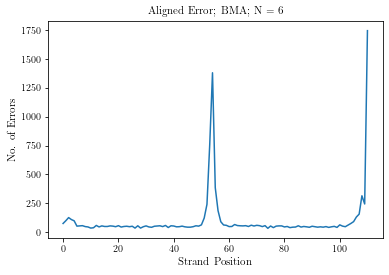

In [13]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]

for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)

strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

f = plt.figure()
plt.plot(range(strand_len + 1), pos_counts)
plt.title(r'Aligned Error; BMA; N = 6', fontsize=11)
plt.xlabel(r'Strand Position', fontsize=11)
plt.ylabel(r'No. of Errors', fontsize=11)
plt.show()
f.savefig('cov6-our-bma-aligned.pdf', bbox_inches='tight')

In [14]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [15]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

In [16]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


[0, 15, 19, 21, 6, 7, 4, 7, 4, 8, 1, 3, 12, 7, 7, 12, 11, 9, 9, 5, 9, 7, 4, 7, 9, 5, 5, 8, 9, 9, 10, 9, 3, 9, 9, 7, 9, 19, 8, 7, 6, 8, 7, 5, 8, 9, 10, 5, 8, 9, 5, 16, 6, 17, 77, 36, 14, 15, 7, 9, 11, 8, 13, 11, 7, 6, 15, 9, 9, 7, 10, 7, 7, 6, 4, 9, 4, 13, 7, 8, 9, 7, 6, 11, 8, 13, 7, 9, 9, 9, 12, 5, 7, 12, 8, 7, 8, 11, 13, 6, 11, 12, 5, 17, 24, 16, 36, 39, 81, 84, 96]
[0, 3, 6, 3, 7, 4, 2, 9, 5, 4, 4, 5, 8, 6, 6, 6, 8, 2, 6, 9, 10, 5, 4, 6, 3, 5, 6, 5, 6, 7, 5, 7, 5, 8, 6, 4, 6, 5, 3, 9, 6, 5, 4, 6, 6, 4, 3, 4, 4, 2, 8, 5, 6, 18, 52, 33, 18, 5, 4, 3, 3, 8, 6, 2, 7, 5, 7, 8, 6, 8, 6, 8, 3, 2, 9, 7, 6, 3, 4, 10, 5, 4, 4, 4, 4, 5, 6, 3, 8, 5, 6, 2, 3, 3, 2, 5, 0, 3, 5, 1, 7, 7, 9, 8, 9, 9, 20, 13, 42, 45, 417]
[32, 31, 24, 1, 7, 3, 2, 1, 3, 3, 0, 0, 1, 2, 2, 1, 4, 4, 1, 0, 2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 3, 1, 0, 2, 1, 1, 1, 2, 2, 1, 7, 2, 2, 2, 2, 1, 4, 3, 1, 1, 7, 13, 41, 132, 242, 36, 11, 5, 1, 3, 3, 1, 4, 3, 2, 2, 3, 0, 1, 1, 8, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 4, 1, 0, 1, 5, 1, 4, 1, 3, 2

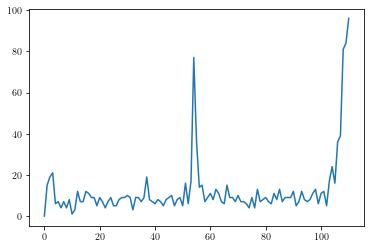

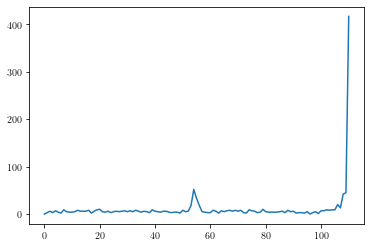

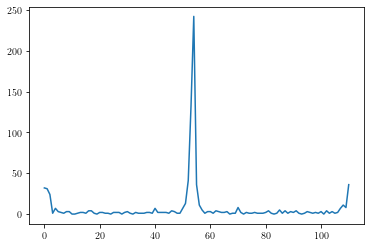

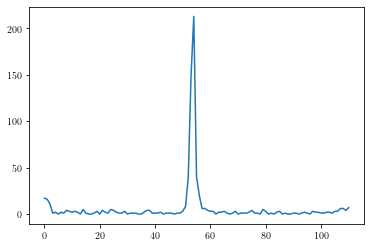

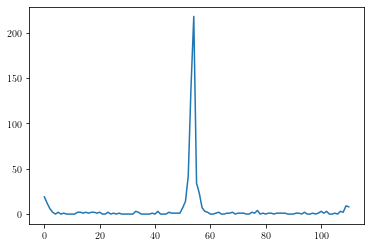

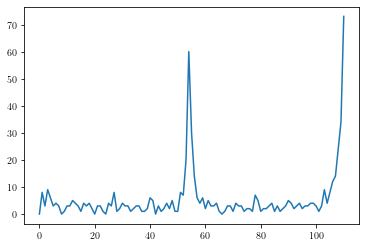

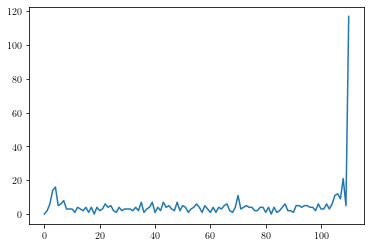

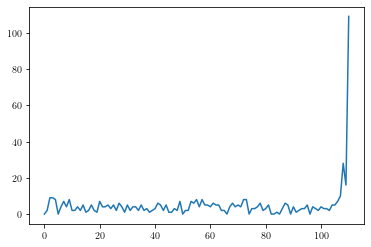

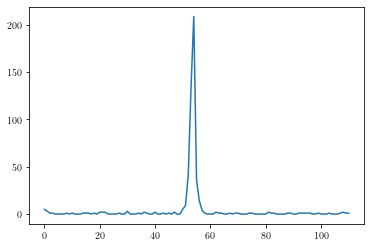

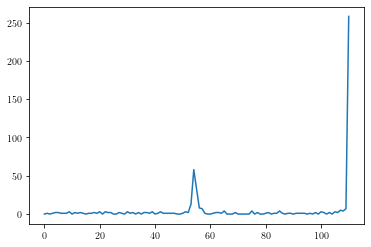

In [17]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    print(pos_map[key])
    plt.plot(range(strand_len + 1), pos_map[key])

In [18]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)